# Exercício sem12.
## Introdução-
 
- Nesta base de dados temos informações sobre o Titanic e foram retiradas da rede Kaggle.
Após pequenas análises podemos perceber alguns elementos para justificar ou começarmos a pensar no por que de uma algumas pessoas de uma classe ou idade tenha sobrevivido ao acidente.



## Processamento-
### -Funções de processamentos.

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
df_exc = pd.read_csv("titanic.csv")
df_exc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
traducoes = {
    'PassengerId': 'IdPassageiro',
    'Survived': 'Sobreviveu', # 0 = Não, 1 = Sim
    'Pclass': 'Classe', # 1, 2, 3
    'Name': 'Nome',
    'Sex': 'Sexo',
    'Age': 'Idade',
    'SibSp': 'NumeroIrmaos',
    'Parch':  'NumeroPais',
    'Ticket': 'NumeroTicket',
    'Fare': 'PrecoTicket',
    'Cabin' : 'NumeroCabine',
    'Embarked': 'PortoEmbarcacao' # C = Cherbourg, Q = Queenstown, S = Southampton
}

novas_colunas = []

for chave, valor in traducoes.items():
    novas_colunas.append(valor)

novas_colunas

['IdPassageiro',
 'Sobreviveu',
 'Classe',
 'Nome',
 'Sexo',
 'Idade',
 'NumeroIrmaos',
 'NumeroPais',
 'NumeroTicket',
 'PrecoTicket',
 'NumeroCabine',
 'PortoEmbarcacao']

In [8]:
df_exc.columns = novas_colunas
df_exc[:2]

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,NumeroIrmaos,NumeroPais,NumeroTicket,PrecoTicket,NumeroCabine,PortoEmbarcacao
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
df_exc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IdPassageiro     891 non-null    int64  
 1   Sobreviveu       891 non-null    int64  
 2   Classe           891 non-null    int64  
 3   Nome             891 non-null    object 
 4   Sexo             891 non-null    object 
 5   Idade            714 non-null    float64
 6   NumeroIrmaos     891 non-null    int64  
 7   NumeroPais       891 non-null    int64  
 8   NumeroTicket     891 non-null    object 
 9   PrecoTicket      891 non-null    float64
 10  NumeroCabine     204 non-null    object 
 11  PortoEmbarcacao  889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_exc.describe()

,IdPassageiro,Sobreviveu,Classe,Idade,NumeroIrmaos,NumeroPais,PrecoTicket
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


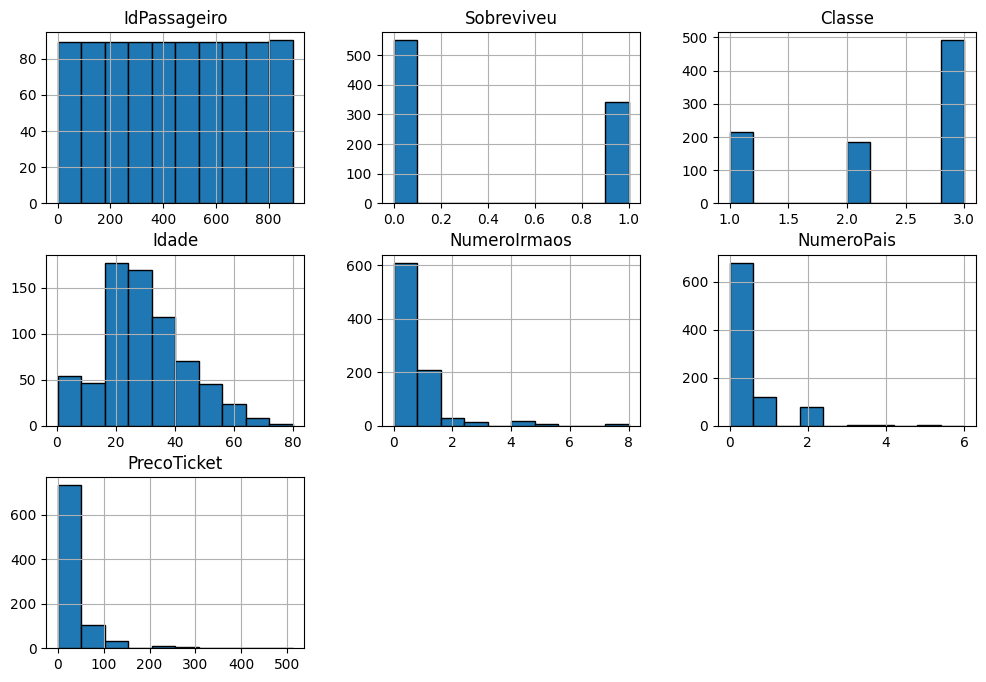

In [11]:
df_exc.hist(figsize=(12,8), edgecolor='black');

In [19]:
sexo_classe = df_exc.groupby(["Sexo", "Classe"]).agg({"Sobreviveu": ['count', 'mean', 'median', 'min', 'max']})
sexo_classe

Sobreviveu                         
                   count      mean median min max
Sexo   Classe                                    
female 1              94  0.968085    1.0   0   1
       2              76  0.921053    1.0   0   1
       3             144  0.500000    0.5   0   1
male   1             122  0.368852    0.0   0   1
       2             108  0.157407    0.0   0   1
       3             347  0.135447    0.0   0   1

Text(0.5, 1.0, 'Demonstrativo de sexo por classe')

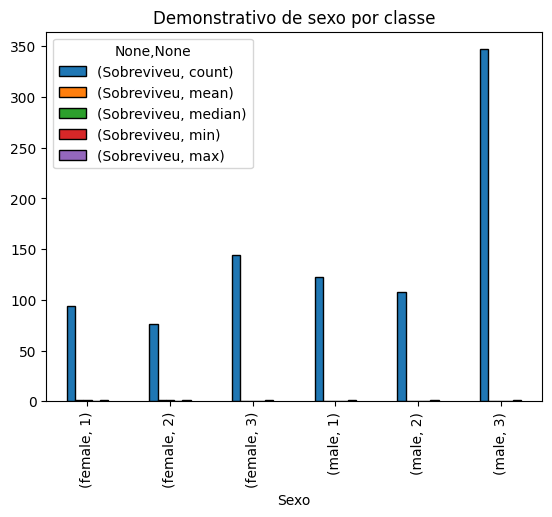

In [18]:
sexo_classe1 = sexo_classe
sexo_classe1.plot.bar(edgecolor="black");


plt.xlabel("Sexo")
plt.title("Demonstrativo de sexo por classe")

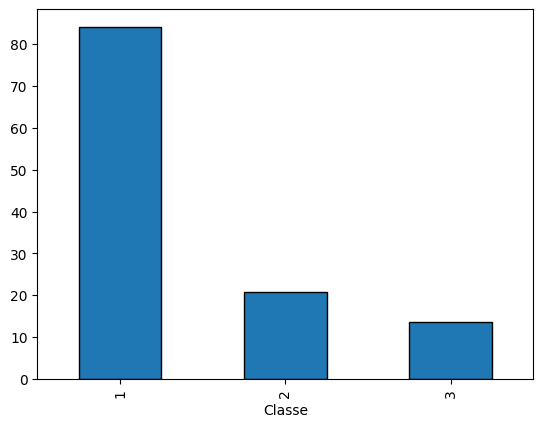

In [22]:
taxa_sob_classe = df_exc.groupby('Classe')["PrecoTicket"].mean()
taxa_sob_classe.plot.bar(edgecolor="black");

Text(0.5, 1.0, 'Distribuição de Idade')

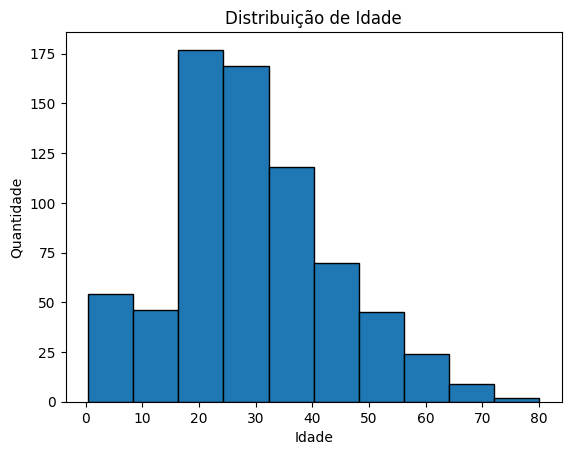

In [24]:
df_exc['Idade'].plot.hist(bins=10, edgecolor='black');

plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Distribuição de Idade')